<a href="https://colab.research.google.com/github/yihong1011/TibameML/blob/main/06_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# tensorflow 2:
# a. keras已經是一份子
# b. gpu會直接辨別(cuda/cudnn還是要裝), 不需要安裝tensorflow-gpu
# c. eager mode(不用起tf.session就可以測試圖)
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

In [70]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [71]:
import pandas as pd
import random
c = random.randint(0,27)
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,144,250,254,166,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98,241,204,97,126,253,40,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,6,121,247,133,16,0,50,253,27,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,103,253,109,0,0,0,120,231,0,0,0,0,0,0,0,0


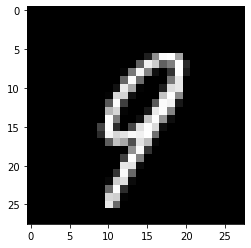

In [72]:
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.imshow(x_train[c], cmap="gray")

In [73]:
# keras有兩種建立模型的方式
# a. Sequentital: 一層疊再一層的上面(限制比較大)
# b. Model: 每一層可以是任何形式去做(自由)
from keras.models import Sequential
# Dense(全連接層 Fully-Connected)
from keras.layers import Dense
# 設定每層要幹嘛
layers = [
    Dense(128, activation="relu", input_dim=784),
    Dense(10, activation="softmax")
]
# 建立模型(帶入layer)
model = Sequential(layers)
model.summary()
# Param(參數) = 本層輸出所使用的weight(權重參數)數量 + 本次激活函式數量的bias(偏移參數)
# 784*128+128=100480
# 128*10+10=1290

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [74]:
# 輸出一個神經元(二元分類): BinaryCrossEntropy plog(1/q) + (1-p)log(1/1-q)
# 輸出多個神經元: CategoricalCrossEntropy p1log(1/q1) + p2log(1/q2)......
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [75]:
# 資料預處理
# 對答案做 one_hot_encoding
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [76]:
# 對題目做攤開
# 針對x做處理: 28 * 28 -> 784(numpy reshape)
# reshape(60000, 784) == reshape(-1, 784) == reshape(60000, -1)
x_train.shape
x_train_norm = x_train.reshape(-1, 784) / 255.0
x_test_norm = x_test.reshape(-1, 784) / 255.0

In [77]:
# batch_size: 你看多少筆再進行一次梯度下降(5[圖片大/訓練資料少]-200[圖片小/訓練資料多])
# epochs: 全體資料(60000) 你要看幾輪(我們什麼時候要停的關鍵)
# validation_split: 測試什麼時候停下來要用沒看過的資料(val loss穩定的時候就停, 不要過擬合)
# (60000 * 0.9) / 200 -> 270
# verbose: 0(quiet) 1(full) 2(no progress bar)
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
        ModelCheckpoint("mlp.h5", save_bast_only=True),
        EarlyStopping(patience=10, restore_best_weights=True)
]
model.fit(x_train_norm,
      y_train_cat,
      batch_size=200,
      epochs=50,
      validation_split=0.1,
      callbacks=callbacks
       )

Epoch 1/50
270/270 [==============================] - 2s 7ms/step - loss: 0.4376 - accuracy: 0.8805 - val_loss: 0.1905 - val_accuracy: 0.9503
Epoch 2/50
270/270 [==============================] - 2s 6ms/step - loss: 0.2024 - accuracy: 0.9433 - val_loss: 0.1385 - val_accuracy: 0.9635
Epoch 3/50
270/270 [==============================] - 2s 6ms/step - loss: 0.1521 - accuracy: 0.9569 - val_loss: 0.1182 - val_accuracy: 0.9685
Epoch 4/50
270/270 [==============================] - 1s 5ms/step - loss: 0.1218 - accuracy: 0.9658 - val_loss: 0.1097 - val_accuracy: 0.9698
Epoch 5/50
270/270 [==============================] - 2s 6ms/step - loss: 0.0996 - accuracy: 0.9720 - val_loss: 0.0940 - val_accuracy: 0.9743
Epoch 6/50
270/270 [==============================] - 2s 6ms/step - loss: 0.0836 - accuracy: 0.9771 - val_loss: 0.0881 - val_accuracy: 0.9743
Epoch 7/50
270/270 [==============================] - 2s 6ms/step - loss: 0.0711 - accuracy: 0.9800 - val_loss: 0.0822 - val_accuracy: 0.9762
Epoch 

In [78]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
